In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib import rcParams

In [2]:
# Load data
df = pd.read_excel('data\Core_data_VGE.xlsx')

# Show
df.head()

,RecordID,Age,State/Province,Education level,Age at first pregnancy,Number of pregnancies,Number of deliveries,Number of live births,Cause of fistula,Patient Symptoms,Years leaking,Length of labor,Location of delivery,Outcome of delivery,Years Lost,Years Gained
0,1,20,Vatovavy Fitovinany,None,17.0,3.0,3.0,0.0,Obstructed Labor,Leaking Urine,1.0,more than 4 days,home,stillbirth,0.342,16.4502
1,2,57,Vatovavy Fitovinany,None,18.0,5.0,5.0,2.0,Obstructed Labor,Leaking Urine,39.0,more than 4 days,home,stillbirth,13.338,3.7962
2,3,16,Atsinanana,Completed Primary,NaN,NaN,NaN,NaN,Sexual Violence,Leaking Urine,1.0,NaN,NaN,NaN,0.342,17.8182
3,4,21,Atsinanana,Started Primary But Did Not Finish,16.0,2.0,2.0,1.0,Obstructed Labor,Leaking Urine,2.0,between 2 and 3 days,government hospital,stillbirth,0.684,16.1082
4,5,18,Vatovavy Fitovinany,None,17.0,1.0,1.0,0.0,Obstructed Labor,Leaking Urine,1.0,between 2 and 3 days,government hospital,NaN,0.342,10.1703


In [3]:
# Set up views for each chart

# Distribution of age at first pregnancy
age_dist = df.groupby('Age at first pregnancy', as_index=False)['RecordID'].count()
age_dist['pct_total'] = ((age_dist['RecordID'] /  age_dist['RecordID'].sum()) * 100).round(1)

# Length of birth distribution
labor_len_dist = df\
    .loc[df['Length of labor'].notna()]\
    .groupby('Length of labor', as_index=False)\
    .agg({'RecordID' : 'count'})\
    .sort_values('RecordID')

# Education level distribution
edu_dist = df\
    .groupby('Education level', as_index=False)\
    .agg({'RecordID' : 'count'})\
    .sort_values('RecordID')

abbrev_dict = {'Some Secondary Eduction But Did Not Finish' : 'Unfinished Secondary',
               'Started Primary But Did Not Finish' : 'Unfinished Primary'}
edu_dist['Education level'] = edu_dist['Education level']\
    .apply(lambda x: abbrev_dict[x] if x in abbrev_dict.keys() else x)

# Cause of fistula distribution
cause_dist = df\
    .groupby('Cause of fistula', as_index=False)\
    .agg({'RecordID' : 'count'})\
    .sort_values('RecordID')

In [4]:
# Basic text elements

# Description
desc = "Obstetric fistula is a childbirth injury that happens when a woman can’t access the medical help she\n" +\
"needs while in labor. After losing her baby to stillbirth, the woman is left with a stigmatizing injury\n" +\
"that devastates her life.\n\n" +\
"Obstetric fistula is caused when women go into obstructed labor, meaning the baby can’t pass\n" +\
"normally through the birth canal. Women may spend days in labor without adequate medical\n" +\
"attention, enduring excruciating pain. If the baby can’t be born after so much time has passed, and\n" +\
"a hospital is not within reach, often both mother and baby will die.\n\n" +\
"Occasionally, though, the mother will survive. But the trauma of her long labor will have caused\n" +\
"tissue death, leaving her with a hole through which urine or feces (or sometimes both) will leak\n" +\
"uncontrollably. This is a fistula.\n\n" +\
"The data set is a subset of 468 anonymized patient records provided by surgeons in Madagascar between\n" +\
"February 2018 and February 2020 with the consent of their patients."

quote = '“About 800 women die from pregnancy or childbirth-related complications around the world every day.\n' + \
        'For every woman who dies of maternal related causes, it is estimated that at least 20 women experience\n' + \
        'a maternal morbidity, one of the most severe forms of which is obstetric fistula.” - United Nations\n' +\
        "_" * 120

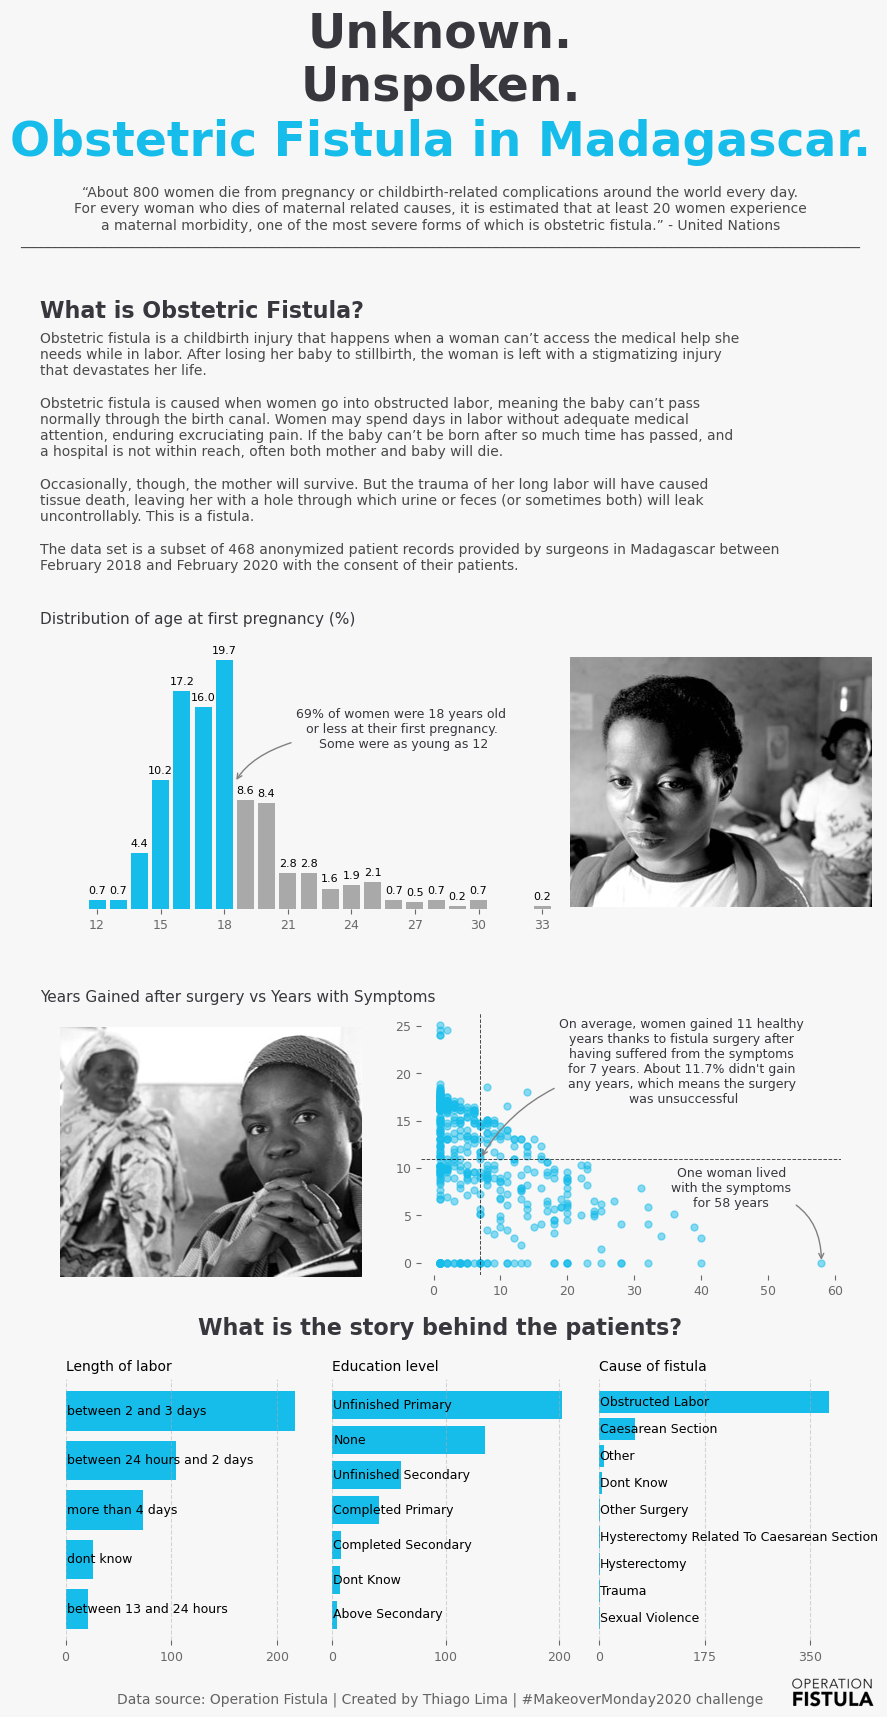

In [5]:
# Basic defaults
rcParams['font.family'] = 'sans-serif'
rcParams.update({'axes.labelsize': 'large'})
main_color = '#16BCEA'

# Define layout
fig = plt.figure(figsize = (10,18), dpi=100, facecolor = '#f7f7f7')
gs = fig.add_gridspec(4, 9)
ax1 = fig.add_subplot(gs[1, :6])
ax2 = fig.add_subplot(gs[1, 6:]) # Placeholder for image
ax2.axis('off')
ax3 = fig.add_subplot(gs[2, :5]) # placeholder for image
ax3.axis('off')
ax4 = fig.add_subplot(gs[2, 4:])
ax5 = fig.add_subplot(gs[3, :3])
ax6 = fig.add_subplot(gs[3, 3:6]) 
ax7 = fig.add_subplot(gs[3, 6:]) 


# Distribution of age at first pregnancy
for age, pct in zip(age_dist['Age at first pregnancy'],  age_dist['pct_total'] ):
    color = '#A9A9A9' if age > 18 else main_color
    ax1.bar(age, pct, color=color) #, alpha=0.8)
    ax1.annotate(s=pct, xy=(age, pct + 0.5), ha='center', size=8)
fig.text(x =0.1, y= 0.69, s='Distribution of age at first pregnancy (%)', color='#37373d', size=11, ha='left')
ax1.get_yaxis().set_visible(False)
xticks = ax1.set_xticks(np.arange(12, 34, 3))

pct_children = "{:.0%}".format(age_dist.loc[age_dist['Age at first pregnancy'] <= 18, 'RecordID'].sum()/age_dist['RecordID'].sum())
ax1.annotate(s=f'{pct_children} of women were 18 years old\nor less at their first pregnancy.\n Some were as young as 12',
            xy=(18.5, 10), xycoords='data', ha='center', size=9,
            xytext=(120, 25), textcoords='offset points', color='#37373d',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-120"})

# First image 
img = image.imread('img\IMG_0254.jpg')
fig.figimage(img, 570, 810)

# Second image
fig.text(x =0.1, y= 0.48, s='Years Gained after surgery vs Years with Symptoms', color='#37373d', size=11, ha='left')
img = image.imread('img\IMG_7290.jpg')
fig.figimage(img, 60, 440)

# Years Gained after surgery vs Years with Symptoms
ax4.scatter(df['Years leaking'], df['Years Gained'].fillna(0), color=main_color, s=25, alpha=0.5)

avg_gained = round(df['Years Gained'].mean())
avg_years_w_symptoms = round(df['Years leaking'].mean())
unsuccessful = "{:.1%}".format(df.loc[df['Years Gained'] == 0]['RecordID'].count() / df['RecordID'].count())

ax4.axhline(y=avg_gained, color='k', linewidth=0.7, linestyle='--', alpha=0.7)
ax4.axvline(x=avg_years_w_symptoms, color='k', linewidth=0.7, linestyle='--', alpha=0.7)

comment = "On average, women gained {} healthy\nyears thanks to fistula surgery after\nhaving suffered from " +\
          "the symptoms\nfor {} years. About {} didn't gain\nany years, which means the surgery\n was unsuccessful"
ax4.annotate(s=comment.format(avg_gained, avg_years_w_symptoms, unsuccessful),
            xy=(7, 11), xycoords='data', ha='center', size=9,
            xytext=(145, 40), textcoords='offset points',  color='#37373d',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-120"})
ax4.annotate(s='One woman lived\nwith the symptoms\nfor 58 years',
            xy=(58, 0), xycoords='data', ha='center', size=9,
            xytext=(-65, 40), textcoords='offset points',  color='#37373d',
            arrowprops={'arrowstyle' : "->", 'color' : '#808080', 'connectionstyle' : "angle3,angleA=0,angleB=-90"})

# Patient breakdown
fig.text(x =0.5, y= 0.295, s='What is the story behind the patients?', color='#37373d', size=16, weight='semibold', ha='center')
for (pos, label), val in zip(enumerate(labor_len_dist['Length of labor']), labor_len_dist['RecordID']):
    ax5.barh(y=pos, width=val, color=main_color)
    ax5.annotate(s=label, xy=(1, pos), va='center', size=9)
ax5.set_title('Length of labor', loc='left', size=10)
ax5.set_xticks([0, 100, 200])
ax5.grid(axis='x', linestyle = '--', alpha=0.5, zorder=0)
ax5.set_yticks([])

for (pos, label), val in zip(enumerate(edu_dist['Education level']), edu_dist['RecordID']):
    ax6.barh(y=pos, width=val, color=main_color)
    ax6.annotate(s=label, xy=(1, pos), va='center', size=9)
ax6.set_title('Education level', loc='left', size=10)   
ax6.set_xticks([0, 100, 200])
ax6.grid(axis='x', linestyle = '--', alpha=0.5, zorder=0)
ax6.set_yticks([])

for (pos, label), val in zip(enumerate(cause_dist['Cause of fistula']), cause_dist['RecordID']):
    ax7.barh(y=pos, width=val, color=main_color)
    ax7.annotate(s=label, xy=(1, pos), va='center', size=9)
ax7.set_title('Cause of fistula', loc='left', size=10)
ax7.set_xticks([0, 175, 350])
ax7.grid(axis='x', linestyle = '--', alpha=0.5, zorder=0)
ax7.set_yticks([])

# Overall title and subtitles
fig.text(x=0.5, y=0.95, s='Unknown.\nUnspoken.\n', color='#37373d', size=34, weight='semibold', ha='center')
fig.text(x=0.5, y=0.95, s='Obstetric Fistula in Madagascar.', color=main_color, size=34, weight='semibold', ha='center')

fig.text(x =0.5, y= 0.9, s=quote, size=10, alpha=0.7, ha='center')

fig.text(x =0.1, y= 0.86, s='What is Obstetric Fistula?', color='#37373d', size=16, weight='semibold', ha='left')

fig.text(x =0.1, y= 0.72, s=desc, size=10,  alpha=0.7, ha='left')

# Footnote
fig.text(s='Data source: Operation Fistula | Created by Thiago Lima | #MakeoverMonday2020 challenge', 
                    ha='center', x=0.5, y=0.09, size=10, alpha=0.6)
img = image.imread('img\operation-fistula-logo.png')
fig.figimage(img, 790, 10, zorder=0)

# Clean up
for ax in fig.get_axes():
    ax.patch.set_alpha(0)
    for spine in ax.spines: # Remove borders
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='both', labelsize=9, colors='#696969')
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Save as png
fig.savefig('obstetric_fistula_plot.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')